<a href="https://colab.research.google.com/github/maielhadad99/Video_Game_Sales_Pred/blob/main/Kaggle_project_1_vgsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
data=pd.read_csv('/content/vgsales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.select_dtypes(include=['object'])


,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo
...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision
16596,Know How 2,DS,Puzzle,7G//AMES


In [ ]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
#OneHot Encoder
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
data['Name']=en.fit_transform(data['Name'].values.reshape(-1,1)).toarray()
data['Platform']=en.fit_transform(data['Platform'].values.reshape(-1,1)).toarray()
data['Genre']=en.fit_transform(data['Genre'].values.reshape(-1,1)).toarray()
data['Publisher']=en.fit_transform(data['Publisher'].values.reshape(-1,1)).toarray()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  float64
 2   Platform      16598 non-null  float64
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  float64
 5   Publisher     16598 non-null  float64
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.4 MB


In [ ]:
df = data
df.describe()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.000060,0.008013,2006.406443,0.199783,0.000181,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.007762,0.089159,5.828981,0.399849,0.013443,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.000000,0.000000,2007.000000,0.000000,0.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.000000,0.000000,2010.000000,0.000000,0.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,1.000000,1.000000,2020.000000,1.000000,1.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
miss_val=df.isna().sum()
miss_val

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
miss_val[miss_val>0].sort_values(ascending=False)

Year    271
dtype: int64

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,0.0,0.0,2006.0,0.0,0.0,41.49,29.02,3.77,8.46,82.74
1,2,0.0,0.0,1985.0,0.0,0.0,29.08,3.58,6.81,0.77,40.24
2,3,0.0,0.0,2008.0,0.0,0.0,15.85,12.88,3.79,3.31,35.82
3,4,0.0,0.0,2009.0,0.0,0.0,15.75,11.01,3.28,2.96,33.00
4,5,0.0,0.0,1996.0,0.0,0.0,11.27,8.89,10.22,1.00,31.37


In [ ]:
columns = ['Year']
for column in columns:
    df[columns] = df[columns].fillna(df[columns].mean())
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

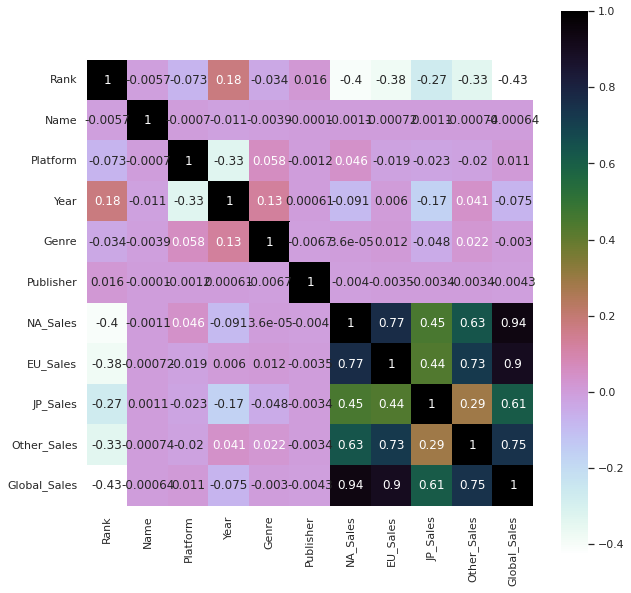

In [ ]:
# Heatmap
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap='cubehelix_r',square=True)
plt.show()

In [ ]:
df.dtypes

Rank              int64
Name            float64
Platform        float64
Year            float64
Genre           float64
Publisher       float64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

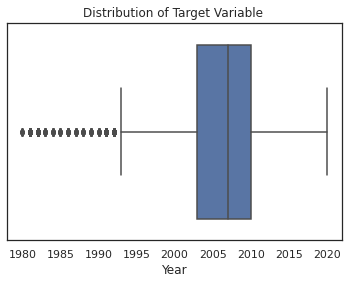

In [ ]:
sns.boxplot(df['Year'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
# Removing the outliers
'''
Q1 = np.percentile(df['Year'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Year'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Year'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

df=df[df.Year<up_lim]
df=df[df.Year>low_lim]
'''

"\nQ1 = np.percentile(df['Year'], 25, interpolation = 'midpoint')  \nQ2 = np.percentile(df['Year'], 50, interpolation = 'midpoint')  \nQ3 = np.percentile(df['Year'], 75, interpolation = 'midpoint')     \nIQR = Q3 - Q1 \nlow_lim = Q1 - 1.5 * IQR \nup_lim = Q3 + 1.5 * IQR\nprint('low limit:', low_lim) \nprint('upper limit:', up_lim)\n\ndf=df[df.Year<up_lim]\ndf=df[df.Year>low_lim]\n"

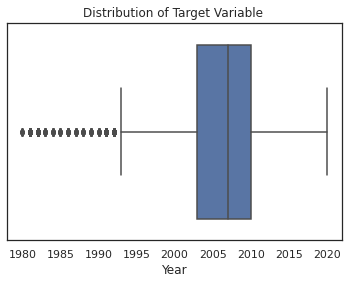

In [ ]:
sns.boxplot(df['Year'])
plt.title('Distribution of Target Variable ')
plt.show()

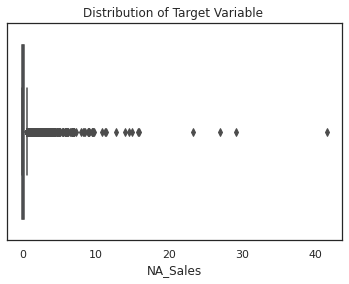

In [ ]:
sns.boxplot(df['NA_Sales'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
# Removing the outliers
'''Q1 = np.percentile(df['NA_Sales'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['NA_Sales'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['NA_Sales'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

df=df[df.NA_Sales<up_lim]
df=df[df.NA_Sales>low_lim]'''

"Q1 = np.percentile(df['NA_Sales'], 25, interpolation = 'midpoint')  \nQ2 = np.percentile(df['NA_Sales'], 50, interpolation = 'midpoint')  \nQ3 = np.percentile(df['NA_Sales'], 75, interpolation = 'midpoint')     \nIQR = Q3 - Q1 \nlow_lim = Q1 - 1.5 * IQR \nup_lim = Q3 + 1.5 * IQR\nprint('low limit:', low_lim) \nprint('upper limit:', up_lim)\n\ndf=df[df.NA_Sales<up_lim]\ndf=df[df.NA_Sales>low_lim]"

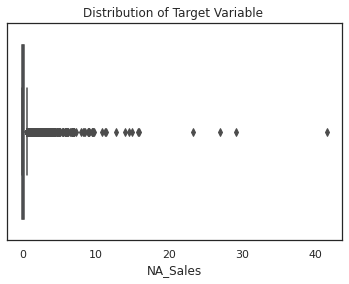

In [ ]:
sns.boxplot(df['NA_Sales'])
plt.title('Distribution of Target Variable ')
plt.show()

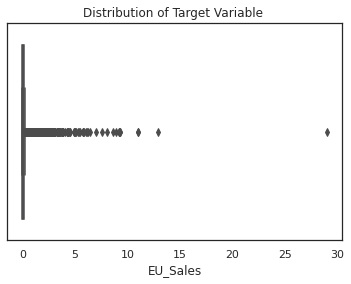

In [ ]:
sns.boxplot(df['EU_Sales'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
# Removing the outliers
'''Q1 = np.percentile(df['EU_Sales'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['EU_Sales'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['EU_Sales'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

df=df[df.EU_Sales<up_lim]
df=df[df.EU_Sales>low_lim]'''

"Q1 = np.percentile(df['EU_Sales'], 25, interpolation = 'midpoint')  \nQ2 = np.percentile(df['EU_Sales'], 50, interpolation = 'midpoint')  \nQ3 = np.percentile(df['EU_Sales'], 75, interpolation = 'midpoint')     \nIQR = Q3 - Q1 \nlow_lim = Q1 - 1.5 * IQR \nup_lim = Q3 + 1.5 * IQR\nprint('low limit:', low_lim) \nprint('upper limit:', up_lim)\n\ndf=df[df.EU_Sales<up_lim]\ndf=df[df.EU_Sales>low_lim]"

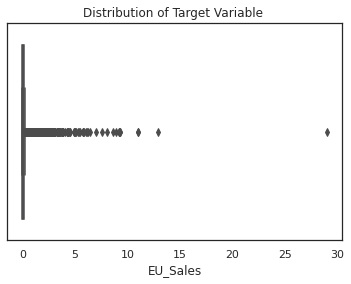

In [ ]:
sns.boxplot(df['EU_Sales'])
plt.title('Distribution of Target Variable ')
plt.show()

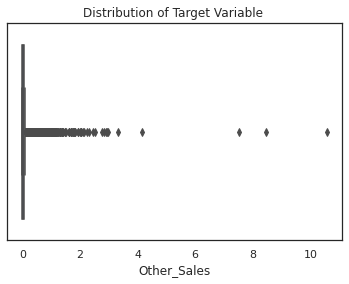

In [ ]:
sns.boxplot(df['Other_Sales'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
# Removing the outliers
'''Q1 = np.percentile(df['Other_Sales'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Other_Sales'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Other_Sales'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

df=df[df.Other_Sales<up_lim]
df=df[df.Other_Sales>low_lim]'''

"Q1 = np.percentile(df['Other_Sales'], 25, interpolation = 'midpoint')  \nQ2 = np.percentile(df['Other_Sales'], 50, interpolation = 'midpoint')  \nQ3 = np.percentile(df['Other_Sales'], 75, interpolation = 'midpoint')     \nIQR = Q3 - Q1 \nlow_lim = Q1 - 1.5 * IQR \nup_lim = Q3 + 1.5 * IQR\nprint('low limit:', low_lim) \nprint('upper limit:', up_lim)\n\ndf=df[df.Other_Sales<up_lim]\ndf=df[df.Other_Sales>low_lim]"

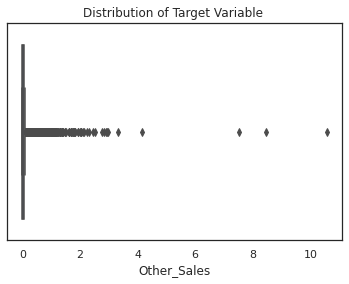

In [ ]:
sns.boxplot(df['Other_Sales'])
plt.title('Distribution of Target Variable ')
plt.show()

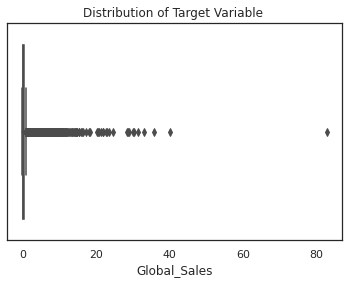

In [ ]:
sns.boxplot(df['Global_Sales'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
# Removing the outliers
'''Q1 = np.percentile(df['Global_Sales'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Global_Sales'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Global_Sales'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

df=df[df.Global_Sales<up_lim]
df=df[df.Global_Sales>low_lim]'''

"Q1 = np.percentile(df['Global_Sales'], 25, interpolation = 'midpoint')  \nQ2 = np.percentile(df['Global_Sales'], 50, interpolation = 'midpoint')  \nQ3 = np.percentile(df['Global_Sales'], 75, interpolation = 'midpoint')     \nIQR = Q3 - Q1 \nlow_lim = Q1 - 1.5 * IQR \nup_lim = Q3 + 1.5 * IQR\nprint('low limit:', low_lim) \nprint('upper limit:', up_lim)\n\ndf=df[df.Global_Sales<up_lim]\ndf=df[df.Global_Sales>low_lim]"

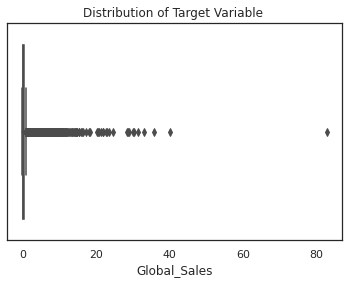

In [ ]:
sns.boxplot(df['Global_Sales'])
plt.title('Distribution of Target Variable ')
plt.show()

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25)

In [ ]:
train_x=train.drop(['Global_Sales'],axis=1)
train_y=train['Global_Sales']

test_x=test.drop(['Global_Sales'],axis=1)
test_y=test['Global_Sales']

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

abcl = AdaBoostRegressor( n_estimators= 20)
abcl = abcl.fit(train_x, train_y)

test_pred = abcl.predict(test_x)
abcl_score=abcl.score(test_x, test_y)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))

The Adaboost Ensemble model accuracy is 0.9662015635431308
